In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
X.shape

(506, 13)

In [5]:
X.shape[0]

506

In [6]:
Y = Y.reshape((506, 1))
Y.shape

(506, 1)

## My implementation of linear regression with SGD.

In [7]:
def random_mini_batches(X, Y, mini_batch_size = 1, seed = 0):
    np.random.seed(seed)            
    m = X.shape[0]                  
    mini_batches = []
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m,1))
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*mini_batch_size:(k+1)*mini_batch_size,:]
        mini_batch_Y = shuffled_Y[k*mini_batch_size:(k+1)*mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[m-mini_batch_size*num_complete_minibatches:m, :]
        mini_batch_Y = shuffled_Y[m-mini_batch_size*num_complete_minibatches:m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [11]:
def initialize_parameters(X):
    np.random.seed(3)
    W1 = np.random.randn(X.shape[1], 1)*0.01
    B1 = np.zeros((X.shape[0], 1))
    return W1, B1

In [12]:
def linear_forward(A, W, b):
    Z = np.dot(A, W) + b  
    cache = (A, W, b)
    return Z, cache

In [13]:
def compute_cost(AL, Y):
    cost = (1/Y.shape[0])*((Y-AL)**2)
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    return cost

In [14]:
def compute_cost_with_regularization(AL, Y, W, lambd):
    L2_regularization_cost = lambd*(np.square(W))
    cross_entropy_cost = compute_cost(AL, Y)
    cost = cross_entropy_cost + L2_regularization_cost
    cost = np.mean(cost)
    return cost

In [15]:
def going_forward(X, Y, lambd, no_of_iterations, learning_rate):
    costs = []
    W_s = []
    B_s = []
    mini_batches = random_mini_batches(X, Y)
    secure_random = random.SystemRandom()
    mini_batch = secure_random.choice(mini_batches)
    minibatch_X = mini_batch[0]
    minibatch_Y = mini_batch[1]
    W, B = initialize_parameters(minibatch_X)
    Z, cache = linear_forward(minibatch_X, W, B)
    cost = compute_cost_with_regularization(Z, minibatch_Y, W, lambd)
    costs.append(cost)
    W_s.append(W)
    B_s.append(B)
    for i in range(no_of_iterations):
        secure_random = random.SystemRandom()
        mini_batch = secure_random.choice(mini_batches)
        minibatch_X = mini_batch[0]
        minibatch_Y = mini_batch[1]
        X_for_W = (-2*minibatch_X)*(np.subtract(minibatch_Y, np.add(np.dot(minibatch_X, W), B)))
        X_for_W = X_for_W.flatten()
        X_for_W = X_for_W.reshape(X_for_W.shape[0], 1)
        sum_for_W = np.sum(X_for_W)
        W = W - learning_rate*sum_for_W
        X_for_B = (-2)*(np.subtract(minibatch_Y, np.add(np.dot(minibatch_X, W), B)))
        X_for_B = X_for_B.flatten()
        X_for_B = X_for_B.reshape(X_for_B.shape[0], 1)
        sum_for_B = np.sum(X_for_B)
        B = B - learning_rate*sum_for_B
        Z, cache = linear_forward(minibatch_X, W, B)
        cost = compute_cost_with_regularization(Z, minibatch_Y, W, lambd)
        costs.append(cost)
        W_s.append(W)
        B_s.append(B)
        learning_rate = learning_rate/2
    lowest_cost = min(costs)
    optimal_W = W_s[costs.index(min(costs))]
    optimal_B = B_s[costs.index(min(costs))]
    return lowest_cost, optimal_W, optimal_B

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [17]:
C = []
W = []
B = []
lr_during_looping = []
lambds_during_looping = []
learning_rates = [0.000001, 0.00001, 0.0001, 0.001,0.01,0.1, 1, 10, 100, 1000]
lambds = [0.01, 0.1, 1, 2, 3, 4, 5]
for learning_rate in learning_rates:
    for lambd in lambds:
        lowest_cost, best_W, best_B = going_forward(X_train, Y_train, lambd, 10000, learning_rate)
        C.append(lowest_cost)
        W.append(best_W)
        B.append(best_B)
        lr_during_looping.append(learning_rate)
        lambds_during_looping.append(lambd)

In [18]:
print('The minimum cost came out to be: {}'.format(min(C)))

The minimum cost came out to be: 0.0826887135105834


In [103]:
optimal_learning_rate = lr_during_looping[C.index(min(C))]
print('\nThe optimal value of learning rate is {}'.format(optimal_learning_rate))


The optimal value of learning rate is 0.01


In [104]:
optimal_lambda = lambds_during_looping[C.index(min(C))]
print('\nThe optimal value of lambda for regularization is {}'.format(optimal_lambda))


The optimal value of lambda for regularization is 0.01


In [105]:
optimal_W = W[C.index(min(C))]

In [106]:
optimal_W.shape

(13, 1)

In [107]:
optimal_B = B[C.index(min(C))]

In [108]:
optimal_B.shape

(1, 1)

In [109]:
Y_pred, cache = linear_forward(X_test, optimal_W, optimal_B)

In [110]:
Y_pred.shape

(167, 1)

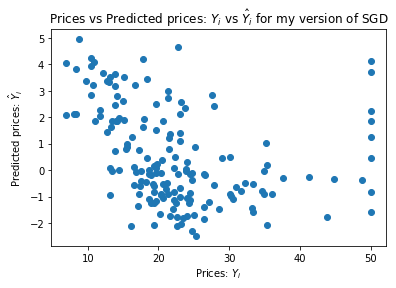

In [111]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ for my version of SGD")
plt.show()

In [112]:
cost = compute_cost_with_regularization(Y_pred, Y_test, optimal_W, optimal_lambda)
print('The cost on test data is {}'.format(cost))

The cost on test data is 3.5482660632166327


## Sklearn implementation of linear regression

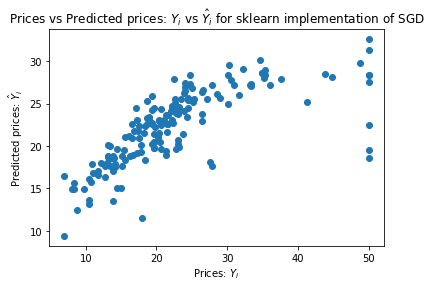

In [113]:

lm=linear_model.SGDRegressor(loss='squared_loss', penalty='l2', alpha = 3, fit_intercept=True, max_iter=100, tol=None)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ for sklearn implementation of SGD")
plt.show()

In [114]:
error = mean_squared_error(Y_test, Y_pred)
print('The error on test data is {}'.format(error))

The error on test data is 51.276280141250105


## Comparison for both implementations.

In [115]:
W_s = lm.coef_

In [116]:
B_s = lm.intercept_

In [117]:
W_s = W_s.reshape(13, 1)

In [118]:
x = PrettyTable()
x.field_names = ['value for weight vector for sklearn implementation', 'value for weight vector for my implementation']
for i in range(W_s.shape[0]):
    x.add_row([W_s[i], optimal_W[i]])
x.add_row([B_s, optimal_B])
print(x)

+----------------------------------------------------+-----------------------------------------------+
| value for weight vector for sklearn implementation | value for weight vector for my implementation |
+----------------------------------------------------+-----------------------------------------------+
|                   [-0.46144328]                    |                  [0.43857888]                 |
|                    [0.30506616]                    |                  [0.42505769]                 |
|                   [-0.48560377]                    |                  [0.42165757]                 |
|                    [0.13301885]                    |                  [0.40205767]                 |
|                   [-0.35152274]                    |                  [0.41791871]                 |
|                    [1.14708353]                    |                   [0.417145]                  |
|                   [-0.31624167]                    |                  [

In [119]:
x = PrettyTable()
x.field_names = ['MSE for sklearn implementation', 'MSE for my implementation']
x.add_row([error, cost])
print(x)

+--------------------------------+---------------------------+
| MSE for sklearn implementation | MSE for my implementation |
+--------------------------------+---------------------------+
|       51.276280141250105       |     3.5482660632166327    |
+--------------------------------+---------------------------+
